# 09 - Improved Fraud Detection

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

We will be using the Credit Card Fraud Detection data set available at https://www.kaggle.com/mlg-ulb/creditcardfraud.   The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This data set is of interest precisely because it is unbalanced, since it is like the distribution that is typical in a Tax Administration, where the vast majority of taxpayers are not defrauding the Tax Administration. We are likely to see a similar distribution.



In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('creditcard.csv')
raw_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
raw_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
cleaned_df = raw_df.copy()

# We don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


We have a data set with 284,807 labeled data points.  We will use 80% of this data to train our models, and we use the remaining 20% to test and validate our models.  Since the data set is unbalanced, we need a sufficiently large set for the Test set, so an 80-20 split seems reasonable.

Examine the data

In [6]:
neg_tot, pos_tot = np.bincount(cleaned_df['Class'])
total_tot = neg_tot + pos_tot
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_tot, pos_tot, 100 * pos_tot / total_tot))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



With a total 0f 0.17% positive cases, our training will be drowned with negative data. We will crete a subset of cases with all known positive cases and a random sample of negative cases so our distribution will be 30% positive and 70% negative. 

In [7]:
positive_df = cleaned_df[cleaned_df['Class'] == 1]
negative_df = cleaned_df[cleaned_df['Class'] == 0]
positive_samples = positive_df.shape[0]
negative_samples = int(positive_df.shape[0] * 100 / 30)

rows = np.random.choice(negative_df.index.values, negative_samples)
reduced_negative_df = negative_df.loc[rows]
print("Positive samples: ", positive_df.shape[0])
print("Negative samples: ", reduced_negative_df.shape[0])

Positive samples:  492
Negative samples:  1640


In [8]:
reducedSet = pd.concat([positive_df, reduced_negative_df], axis=0).sample(frac=1)
reducedSet.describe()

V1           V2           V3           V4           V5  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     -1.116520     0.770658    -1.643269     1.052017    -0.695898   
std       4.216811     3.051770     4.689698     2.676329     3.188577   
min     -30.552380   -34.607649   -31.103685    -4.637015   -22.105532   
25%      -1.533306    -0.469429    -1.923622    -0.670819    -1.070645   
50%      -0.359752     0.299660    -0.314016     0.397800    -0.160633   
75%       1.218308     1.294527     0.766643     1.874962     0.588277   
max       2.418267    22.057729     3.225559    12.114672    34.099309   

                V6           V7           V8           V9          V10  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean     -0.280682    -1.324531     0.127066    -0.607183    -1.312546  ...   
std       1.664390     4.307937     3.493426     1.880197     3.465047  ...   
min     -23.496714   -43.557242   -41.044261   -13.434066   -24.588262  ...   
25%      -1.015683    -1.101085    -0.193119    -1.204301    -1.231656  ...   
50%      -0.368361    -0.128943     0.082613    -0.243668    -0.316468  ...   
75%       0.320935     0.425691     0.556013     0.439650     0.258950  ...   
max       7.224100     6.645921    20.007208     7.496577     8.068690  ...   

               V21          V22          V23          V24          V25  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean      0.148235     0.006610    -0.016076    -0.016498     0.001392   
std       2.010477     0.972456     0.940844     0.582589     0.591397   
min     -22.797604    -8.887017   -19.254328    -2.342153    -4.781606   
25%      -0.204301    -0.542295    -0.185828    -0.368183    -0.317365   
50%       0.045093     0.023754    -0.014504     0.027191     0.027517   
75%       0.310865     0.567709     0.176053     0.425291     0.366446   
max      27.202839     8.361985     7.290393     2.192626     2.820430   

               V26          V27          V28        Class  Log Ammount  
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  
mean      0.002241     0.040089     0.014062     0.230769     2.756543  
std       0.470183     0.758782     0.402574     0.421424     2.496255  
min      -1.260693    -7.263482    -3.509250     0.000000    -6.907755  
25%      -0.304335    -0.068211    -0.057586     0.000000     1.125254  
50%      -0.041049     0.020787     0.016425     0.000000     2.995782  
75%       0.246748     0.190275     0.125076     0.000000     4.567164  
max       2.745261     8.254376     6.403911     1.000000     8.112447  

[8 rows x 30 columns]

In [9]:
train_df, test_df = train_test_split(reducedSet, test_size=0.2)

In [10]:
# Form np arrays of labels and features.

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
test_labels = np.array(test_df.pop('Class'))
train_features = np.array(train_df)
test_features = np.array(test_df)

If our data set has some numbers in widely different scales, our models will not work, since variables that have very large range will overpower variables that have smaller ranges.  For this, we scale the data.

We scale each variable by calculating:

z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.

In [11]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

Our data should have a mean of zero and a standard deviation of 1. 

In [12]:
pd.DataFrame(train_features).describe()

0             1             2             3             4   \
count  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03   
mean  -2.292073e-17 -2.292073e-17 -3.959036e-17 -2.708814e-17 -3.125555e-18   
std    1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00   
min   -7.073425e+00 -1.176240e+01 -6.283638e+00 -2.128069e+00 -6.674785e+00   
25%   -1.010699e-01 -4.069305e-01 -5.838295e-02 -6.447829e-01 -1.175093e-01   
50%    1.786540e-01 -1.547987e-01  2.868995e-01 -2.436306e-01  1.756197e-01   
75%    5.620852e-01  1.724551e-01  5.126682e-01  2.892071e-01  4.037203e-01   
max    8.412847e-01  6.878576e+00  1.040139e+00  4.126961e+00  1.087104e+01   

                5             6             7             8             9   \
count  1705.000000  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03   
mean      0.000000 -3.333925e-17  9.897589e-18  3.125555e-17 -5.313443e-17   
std       1.000293  1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00   
min     -13.755171 -9.559227e+00 -1.172084e+01 -6.921120e+00 -6.678284e+00   
25%      -0.430148  5.030927e-02 -1.066817e-01 -3.208308e-01  2.428764e-02   
50%      -0.045160  2.857193e-01 -2.234101e-02  1.961712e-01  2.938527e-01   
75%       0.359417  4.176605e-01  1.172170e-01  5.535967e-01  4.587921e-01   
max       4.454744  1.897635e+00  5.940318e+00  4.378869e+00  2.725285e+00   

       ...            19            20            21            22  \
count  ...  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03   
mean   ...  4.167406e-18 -8.334812e-18  4.167406e-18  8.855738e-18   
std    ...  1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00   
min    ... -1.382646e+01 -1.152418e+01 -9.448902e+00 -1.521502e+01   
25%    ... -3.158294e-01 -1.893197e-01 -5.759837e-01 -2.305857e-01   
50%    ... -1.433664e-01 -5.690535e-02  2.394960e-02  5.131520e-04   
75%    ...  1.810881e-01  9.029238e-02  5.878624e-01  2.481312e-01   
max    ...  1.105219e+01  1.443216e+01  8.864339e+00  9.521414e+00   

                 23            24            25            26            27  \
count  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03  1.705000e+03   
mean  -1.666962e-17  1.666962e-17  3.333925e-17  4.167406e-18 -1.250222e-17   
std    1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00  1.000293e+00   
min   -4.036395e+00 -4.247531e+00 -2.657627e+00 -9.755037e+00 -9.501314e+00   
25%   -6.047434e-01 -5.475535e-01 -6.483812e-01 -1.572698e-01 -1.867654e-01   
50%    7.228276e-02  3.375294e-02 -8.059553e-02 -3.861073e-02  1.084130e-02   
75%    7.470984e-01  6.328109e-01  5.062625e-01  1.948244e-01  3.111680e-01   
max    3.817912e+00  3.776161e+00  5.770031e+00  1.094199e+01  1.527629e+01   

                 28  
count  1.705000e+03  
mean  -2.000355e-16  
std    1.000293e+00  
min   -3.889525e+00  
25%   -6.572326e-01  
50%    1.082517e-01  
75%    7.233439e-01  
max    2.144559e+00  

[8 rows x 29 columns]

We remove outliers to train our model.  

In [13]:
print('Training labels shape:', train_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (1705,)
Test labels shape: (427,)
Training features shape: (1705, 29)
Test features shape: (427, 29)


In [14]:
def plotConfusion(test_labels, predictions_baseline, p):
    cm = confusion_matrix(test_labels, predictions_baseline > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(0.5))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    truePositives = cm[1][1]
    trueNegatives = cm[0][0]
    falsePositives = cm[0][1]
    falseNegatives = cm[1][0]
    
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1ScoreCalculated =  2 * (precision * recall) / (precision + recall)
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score Calculated: {:.4f}'.format(f1ScoreCalculated))
    
    

A confusion matrix and an F1 score are better mechanisms for measuring the effectiveness of the model.    A confusion matrix allows us to visualize how many True Negatives, False Positives, False Negatives and True Positives we have.  100% accuracy would mean 0 False Negatives and 0 False Positives.

We can also use Precision, Recall and F1 scores. 

Precision is the proportion of positive identifications that was actually correct.  

Recall is the proportion of actual positives that was identified correctly.

F1 score is a single metric that is useful if you're looking for a balance between precision and recall and there's an uneven class distribution. The formula for F1 is $F_{1}=\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$



In [15]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

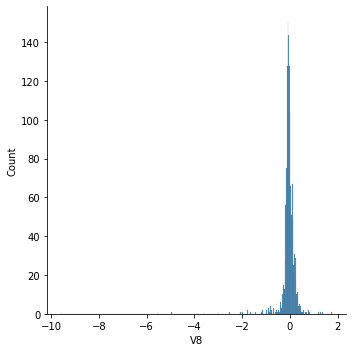

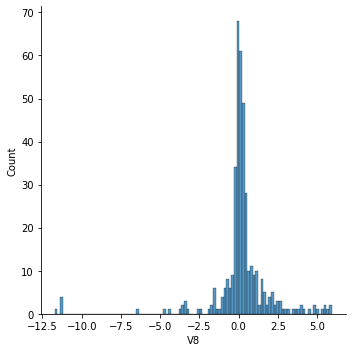

In [16]:
sns.displot(neg_df['V8'])
sns.displot(pos_df['V8'])

Text(0.5, 0.98, 'Negative distribution')

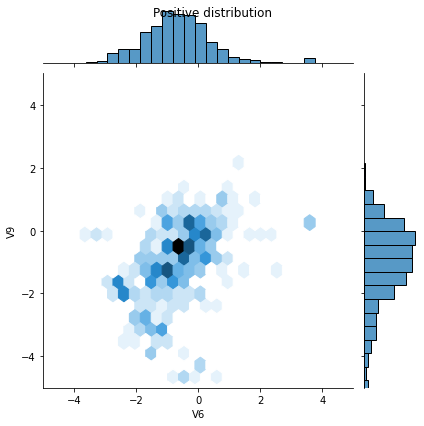

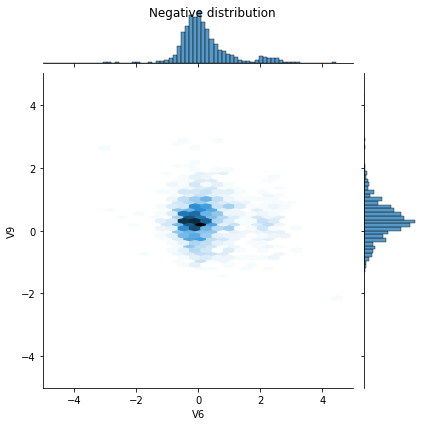

In [17]:
sns.jointplot(x=pos_df['V6'], y=pos_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V6'], y=neg_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

In [18]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [19]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

medium_model2 = keras.Sequential(
    [
        layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(1, activation='sigmoid')
    ]
)

medium_model2.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=METRICS
)

medium_results2 = medium_model2.fit(train_features, train_labels, batch_size=512, epochs = 250, verbose=2, validation_data=(test_features, test_labels))
# medium_results2 = medium_model2.fit(train_features, train_labels, batch_size=4096, epochs = 500, verbose=2, validation_data=(test_features, test_labels))

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/250
4/4 - 2s - loss: 2.1078 - tp: 8.0000 - fp: 172.0000 - tn: 1139.0000 - fn: 386.0000 - accuracy: 0.6727 - precision: 0.0444 - recall: 0.0203 - auc: 0.2665 - prc: 0.1521 - val_loss: 2.0140 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 323.0000 - val_fn: 92.0000 - val_accuracy: 0.7705 - val_precision: 0.5000 - val_recall: 0.0612 - val_auc: 0.5628 - val_prc: 0.3088
Epoch 2/250
4/4 - 0s - loss: 1.9626 - tp: 86.0000 - fp: 14.0000 - tn: 1297.0000 - fn: 308.0000 - accuracy: 0.8111 - precision: 0.8600 - recall: 0.2183 - auc: 0.7221 - prc: 0.5588 - val_loss: 1.8945 - val_tp: 28.0000 - val_fp: 0.0000e+00 - val_tn: 329.0000 - val_fn: 70.0000 - val_accuracy: 0.8361 - val_precision: 1.0000 - val_recall: 0.2857 - val_auc: 0.7836 - val_prc: 0.7212
Epoch 3/250
4/4 - 0s - loss: 1.8437 - tp: 182.0000 - fp: 0.0000e+00 - tn: 1311.0000 - fn: 212.0000 - accuracy: 0.8757 - precision: 1.0000 - recall: 0.4619 - auc: 0.8723 - prc: 0.8260 - val_loss: 1.7853 - val_tp: 43.0000 - val_fp: 0.0000e+00 - val_tn

Epoch 23/250
4/4 - 0s - loss: 0.7249 - tp: 344.0000 - fp: 2.0000 - tn: 1309.0000 - fn: 50.0000 - accuracy: 0.9695 - precision: 0.9942 - recall: 0.8731 - auc: 0.9870 - prc: 0.9765 - val_loss: 0.7615 - val_tp: 79.0000 - val_fp: 1.0000 - val_tn: 328.0000 - val_fn: 19.0000 - val_accuracy: 0.9532 - val_precision: 0.9875 - val_recall: 0.8061 - val_auc: 0.9554 - val_prc: 0.9364
Epoch 24/250
4/4 - 0s - loss: 0.6970 - tp: 345.0000 - fp: 2.0000 - tn: 1309.0000 - fn: 49.0000 - accuracy: 0.9701 - precision: 0.9942 - recall: 0.8756 - auc: 0.9873 - prc: 0.9769 - val_loss: 0.7352 - val_tp: 79.0000 - val_fp: 1.0000 - val_tn: 328.0000 - val_fn: 19.0000 - val_accuracy: 0.9532 - val_precision: 0.9875 - val_recall: 0.8061 - val_auc: 0.9559 - val_prc: 0.9366
Epoch 25/250
4/4 - 0s - loss: 0.6705 - tp: 348.0000 - fp: 2.0000 - tn: 1309.0000 - fn: 46.0000 - accuracy: 0.9718 - precision: 0.9943 - recall: 0.8832 - auc: 0.9873 - prc: 0.9774 - val_loss: 0.7105 - val_tp: 79.0000 - val_fp: 1.0000 - val_tn: 328.0000 

Epoch 45/250
4/4 - 0s - loss: 0.3376 - tp: 349.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 45.0000 - accuracy: 0.9718 - precision: 0.9915 - recall: 0.8858 - auc: 0.9889 - prc: 0.9810 - val_loss: 0.3994 - val_tp: 80.0000 - val_fp: 2.0000 - val_tn: 327.0000 - val_fn: 18.0000 - val_accuracy: 0.9532 - val_precision: 0.9756 - val_recall: 0.8163 - val_auc: 0.9575 - val_prc: 0.9366
Epoch 46/250
4/4 - 0s - loss: 0.3280 - tp: 350.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 44.0000 - accuracy: 0.9724 - precision: 0.9915 - recall: 0.8883 - auc: 0.9892 - prc: 0.9811 - val_loss: 0.3902 - val_tp: 81.0000 - val_fp: 2.0000 - val_tn: 327.0000 - val_fn: 17.0000 - val_accuracy: 0.9555 - val_precision: 0.9759 - val_recall: 0.8265 - val_auc: 0.9572 - val_prc: 0.9368
Epoch 47/250
4/4 - 0s - loss: 0.3189 - tp: 349.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 45.0000 - accuracy: 0.9718 - precision: 0.9915 - recall: 0.8858 - auc: 0.9892 - prc: 0.9813 - val_loss: 0.3818 - val_tp: 81.0000 - val_fp: 2.0000 - val_tn: 327.0000 

Epoch 67/250
4/4 - 0s - loss: 0.2064 - tp: 351.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 43.0000 - accuracy: 0.9730 - precision: 0.9915 - recall: 0.8909 - auc: 0.9901 - prc: 0.9822 - val_loss: 0.2723 - val_tp: 81.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 17.0000 - val_accuracy: 0.9532 - val_precision: 0.9643 - val_recall: 0.8265 - val_auc: 0.9580 - val_prc: 0.9385
Epoch 68/250
4/4 - 0s - loss: 0.2031 - tp: 353.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 41.0000 - accuracy: 0.9742 - precision: 0.9916 - recall: 0.8959 - auc: 0.9900 - prc: 0.9823 - val_loss: 0.2694 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 16.0000 - val_accuracy: 0.9555 - val_precision: 0.9647 - val_recall: 0.8367 - val_auc: 0.9594 - val_prc: 0.9386
Epoch 69/250
4/4 - 0s - loss: 0.2001 - tp: 353.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 41.0000 - accuracy: 0.9736 - precision: 0.9888 - recall: 0.8959 - auc: 0.9898 - prc: 0.9821 - val_loss: 0.2671 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 

Epoch 89/250
4/4 - 0s - loss: 0.1613 - tp: 356.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 38.0000 - accuracy: 0.9754 - precision: 0.9889 - recall: 0.9036 - auc: 0.9900 - prc: 0.9827 - val_loss: 0.2296 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 16.0000 - val_accuracy: 0.9555 - val_precision: 0.9647 - val_recall: 0.8367 - val_auc: 0.9567 - val_prc: 0.9389
Epoch 90/250
4/4 - 0s - loss: 0.1601 - tp: 355.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 39.0000 - accuracy: 0.9748 - precision: 0.9889 - recall: 0.9010 - auc: 0.9900 - prc: 0.9826 - val_loss: 0.2294 - val_tp: 82.0000 - val_fp: 2.0000 - val_tn: 327.0000 - val_fn: 16.0000 - val_accuracy: 0.9578 - val_precision: 0.9762 - val_recall: 0.8367 - val_auc: 0.9576 - val_prc: 0.9393
Epoch 91/250
4/4 - 0s - loss: 0.1590 - tp: 352.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 42.0000 - accuracy: 0.9730 - precision: 0.9888 - recall: 0.8934 - auc: 0.9903 - prc: 0.9828 - val_loss: 0.2291 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 

Epoch 111/250
4/4 - 0s - loss: 0.1441 - tp: 357.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 37.0000 - accuracy: 0.9760 - precision: 0.9889 - recall: 0.9061 - auc: 0.9902 - prc: 0.9830 - val_loss: 0.2131 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9594 - val_prc: 0.9416
Epoch 112/250
4/4 - 0s - loss: 0.1437 - tp: 359.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 35.0000 - accuracy: 0.9765 - precision: 0.9863 - recall: 0.9112 - auc: 0.9907 - prc: 0.9832 - val_loss: 0.2137 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9584 - val_prc: 0.9407
Epoch 113/250
4/4 - 0s - loss: 0.1430 - tp: 356.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 38.0000 - accuracy: 0.9754 - precision: 0.9889 - recall: 0.9036 - auc: 0.9910 - prc: 0.9834 - val_loss: 0.2153 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 133/250
4/4 - 0s - loss: 0.1362 - tp: 354.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 40.0000 - accuracy: 0.9736 - precision: 0.9861 - recall: 0.8985 - auc: 0.9901 - prc: 0.9828 - val_loss: 0.2121 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 16.0000 - val_accuracy: 0.9555 - val_precision: 0.9647 - val_recall: 0.8367 - val_auc: 0.9590 - val_prc: 0.9390
Epoch 134/250
4/4 - 0s - loss: 0.1359 - tp: 354.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 40.0000 - accuracy: 0.9736 - precision: 0.9861 - recall: 0.8985 - auc: 0.9901 - prc: 0.9827 - val_loss: 0.2115 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 16.0000 - val_accuracy: 0.9555 - val_precision: 0.9647 - val_recall: 0.8367 - val_auc: 0.9598 - val_prc: 0.9398
Epoch 135/250
4/4 - 0s - loss: 0.1356 - tp: 355.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 39.0000 - accuracy: 0.9742 - precision: 0.9861 - recall: 0.9010 - auc: 0.9902 - prc: 0.9828 - val_loss: 0.2093 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 155/250
4/4 - 0s - loss: 0.1315 - tp: 355.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 39.0000 - accuracy: 0.9748 - precision: 0.9889 - recall: 0.9010 - auc: 0.9900 - prc: 0.9832 - val_loss: 0.2048 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9604 - val_prc: 0.9410
Epoch 156/250
4/4 - 0s - loss: 0.1313 - tp: 356.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 38.0000 - accuracy: 0.9748 - precision: 0.9861 - recall: 0.9036 - auc: 0.9901 - prc: 0.9832 - val_loss: 0.2047 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9603 - val_prc: 0.9409
Epoch 157/250
4/4 - 0s - loss: 0.1311 - tp: 357.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 37.0000 - accuracy: 0.9754 - precision: 0.9862 - recall: 0.9061 - auc: 0.9899 - prc: 0.9831 - val_loss: 0.2038 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 177/250
4/4 - 0s - loss: 0.1287 - tp: 358.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 36.0000 - accuracy: 0.9760 - precision: 0.9862 - recall: 0.9086 - auc: 0.9901 - prc: 0.9837 - val_loss: 0.2005 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9599 - val_prc: 0.9410
Epoch 178/250
4/4 - 0s - loss: 0.1284 - tp: 355.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 39.0000 - accuracy: 0.9742 - precision: 0.9861 - recall: 0.9010 - auc: 0.9901 - prc: 0.9832 - val_loss: 0.2054 - val_tp: 81.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 17.0000 - val_accuracy: 0.9532 - val_precision: 0.9643 - val_recall: 0.8265 - val_auc: 0.9602 - val_prc: 0.9409
Epoch 179/250
4/4 - 0s - loss: 0.1285 - tp: 353.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 41.0000 - accuracy: 0.9742 - precision: 0.9916 - recall: 0.8959 - auc: 0.9903 - prc: 0.9836 - val_loss: 0.2037 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 199/250
4/4 - 0s - loss: 0.1252 - tp: 359.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 35.0000 - accuracy: 0.9765 - precision: 0.9863 - recall: 0.9112 - auc: 0.9906 - prc: 0.9842 - val_loss: 0.1973 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9600 - val_prc: 0.9415
Epoch 200/250
4/4 - 0s - loss: 0.1260 - tp: 359.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 35.0000 - accuracy: 0.9765 - precision: 0.9863 - recall: 0.9112 - auc: 0.9902 - prc: 0.9838 - val_loss: 0.1989 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9614 - val_prc: 0.9409
Epoch 201/250
4/4 - 0s - loss: 0.1252 - tp: 356.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 38.0000 - accuracy: 0.9748 - precision: 0.9861 - recall: 0.9036 - auc: 0.9903 - prc: 0.9840 - val_loss: 0.2012 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 221/250
4/4 - 0s - loss: 0.1233 - tp: 358.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 36.0000 - accuracy: 0.9760 - precision: 0.9862 - recall: 0.9086 - auc: 0.9907 - prc: 0.9845 - val_loss: 0.1986 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9597 - val_prc: 0.9422
Epoch 222/250
4/4 - 0s - loss: 0.1229 - tp: 358.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 36.0000 - accuracy: 0.9760 - precision: 0.9862 - recall: 0.9086 - auc: 0.9911 - prc: 0.9848 - val_loss: 0.1997 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9594 - val_prc: 0.9413
Epoch 223/250
4/4 - 0s - loss: 0.1238 - tp: 357.0000 - fp: 5.0000 - tn: 1306.0000 - fn: 37.0000 - accuracy: 0.9754 - precision: 0.9862 - recall: 0.9061 - auc: 0.9906 - prc: 0.9841 - val_loss: 0.1995 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.00

Epoch 243/250
4/4 - 0s - loss: 0.1230 - tp: 355.0000 - fp: 3.0000 - tn: 1308.0000 - fn: 39.0000 - accuracy: 0.9754 - precision: 0.9916 - recall: 0.9010 - auc: 0.9911 - prc: 0.9843 - val_loss: 0.2040 - val_tp: 82.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 16.0000 - val_accuracy: 0.9555 - val_precision: 0.9647 - val_recall: 0.8367 - val_auc: 0.9602 - val_prc: 0.9413
Epoch 244/250
4/4 - 0s - loss: 0.1215 - tp: 356.0000 - fp: 4.0000 - tn: 1307.0000 - fn: 38.0000 - accuracy: 0.9754 - precision: 0.9889 - recall: 0.9036 - auc: 0.9913 - prc: 0.9847 - val_loss: 0.1966 - val_tp: 83.0000 - val_fp: 3.0000 - val_tn: 326.0000 - val_fn: 15.0000 - val_accuracy: 0.9578 - val_precision: 0.9651 - val_recall: 0.8469 - val_auc: 0.9606 - val_prc: 0.9424
Epoch 245/250
4/4 - 0s - loss: 0.1217 - tp: 359.0000 - fp: 7.0000 - tn: 1304.0000 - fn: 35.0000 - accuracy: 0.9754 - precision: 0.9809 - recall: 0.9112 - auc: 0.9907 - prc: 0.9845 - val_loss: 0.1947 - val_tp: 83.0000 - val_fp: 2.0000 - val_tn: 327.00

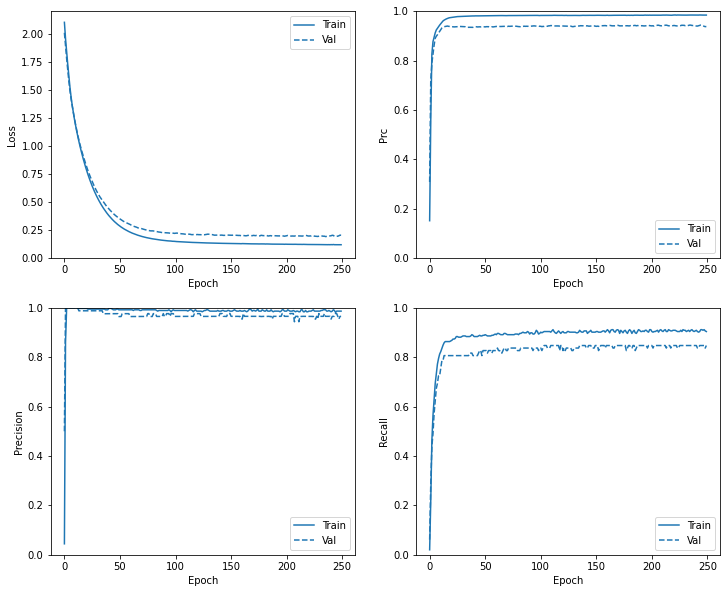

In [20]:
plot_metrics(medium_results2)

In [21]:
medium2_predictions_baseline = medium_model2.predict(test_features, batch_size=4096)

Legitimate Transactions Detected (True Negatives):  326
Legitimate Transactions Incorrectly Detected (False Positives):  3
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  98
Precision: 0.9651
Recall: 0.8469
F1 Score Calculated: 0.9022


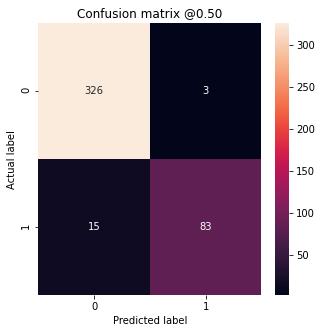

In [22]:
plotConfusion(test_labels, medium2_predictions_baseline, 0.5)

Tensorflow has a similar tutorial for the same data set that may be worth reading :  https://www.tensorflow.org/tutorials/structured_data/imbalanced_data